# Exercise: Clustering Algorithms with Scikit Learn
<img src="../Notebooks/IMG/sk-logo.png" width=200>

* ***SkLearn*** API Reference: https://scikit-learn.org/stable/modules/classes.html
* ***SkLearn*** Clustering Algorithms: https://scikit-learn.org/stable/modules/clustering.html#clustering

In [1]:
#setup env
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
#helper calls
n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

#generating Data Sets A-F
A = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)[0] #1. spalte x-achste 2.spalte y-achse
B = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
C = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
D = np.random.rand(n_samples, 2)
E = (X_aniso, y)[0]
F = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)[0]

## Exercise 1
Plot all raw data sets A-F in one figure.

Hints: use ```scatter``` plots and ```subfigures```.

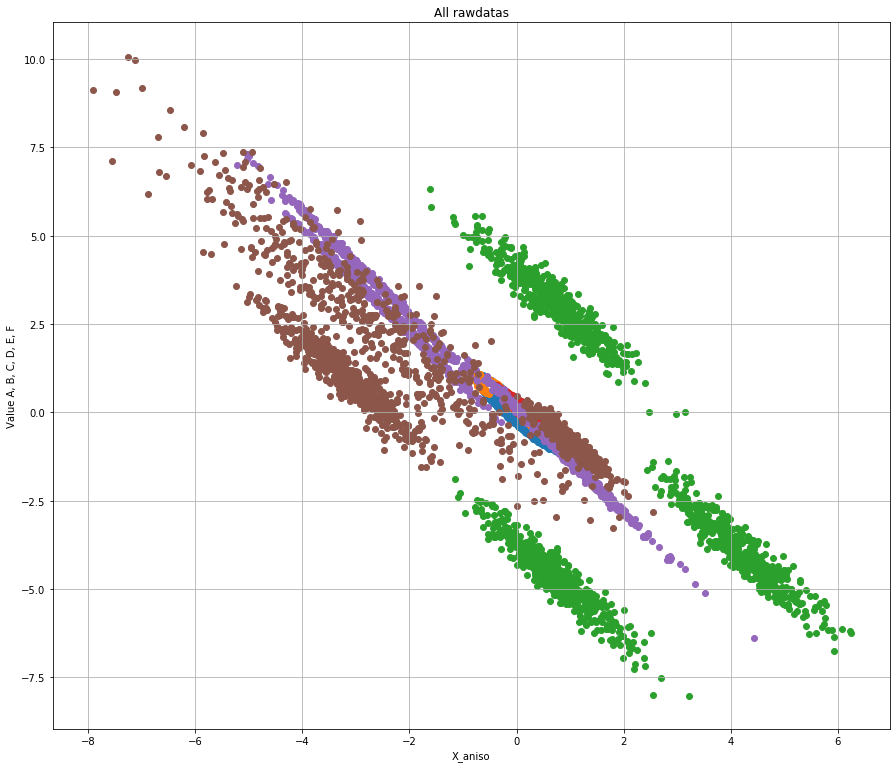

In [11]:
fig, ax = plt.subplots(figsize=(15,13))

A_aniso = np.dot(A, transformation)
B_aniso = np.dot(B, transformation)
C_aniso = np.dot(C, transformation)
D_aniso = np.dot(D, transformation)
E_aniso = np.dot(E, transformation)
F_aniso = np.dot(F, transformation)

ax.grid(True)
plt.title("All rawdatas")
plt.xlabel("X_aniso")
plt.ylabel("Value A, B, C, D, E, F")

ax.scatter(A_aniso[:,0], A_aniso[:,1])
ax.scatter(B_aniso[:,0], B_aniso[:,1])
ax.scatter(C_aniso[:,0], C_aniso[:,1])
ax.scatter(D_aniso[:,0], D_aniso[:,1])
ax.scatter(E_aniso[:,0], E_aniso[:,1])
ax.scatter(F_aniso[:,0], F_aniso[:,1])

## Exercise 2
Perform ```K-Means``` clustering on all data sets: https://scikit-learn.org/stable/modules/clustering.html#k-means
* 2.1 plot all results
* 2.2 manually try to find the best $k$ for each data set (by visual evaluation)
* 2.3 Use the ```K-Means++``` initialization 

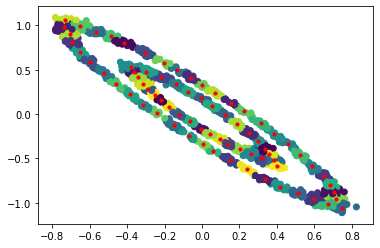

In [20]:
#kmeans for A
A_aniso = np.dot(A, transformation)

kmeans = KMeans(n_clusters=75, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(A_aniso)
plt.scatter(A_aniso[:,0], A_aniso[:,1], c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=10, c='red')
plt.show()

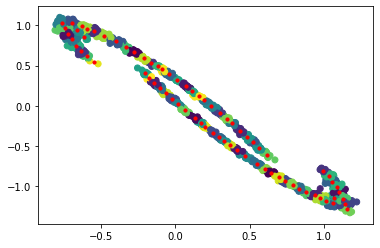

In [21]:
B_aniso = np.dot(B, transformation)

kmeans = KMeans(n_clusters=75, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(B_aniso)
plt.scatter(B_aniso[:,0], B_aniso[:,1], c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=10, c='red')
plt.show()

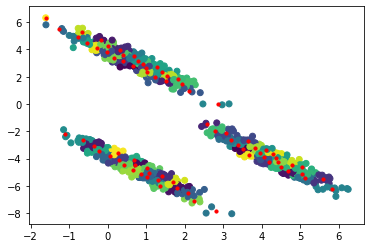

array([[ 5.86749807,  8.17715188],
       [ 5.61369982,  9.93295527],
       [ 7.22508428, 10.44886194],
       ...,
       [ 7.73674097, 10.82855388],
       [-4.61701094, -9.64855983],
       [-3.48640175, -9.25766922]])

In [26]:
C_aniso = np.dot(C, transformation)

kmeans = KMeans(n_clusters=75, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(C_aniso)
plt.scatter(C_aniso[:,0], C_aniso[:,1], c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=10, c='red')
plt.show()


## Exercise 3
Performs ```DBSCAN``` clustering on all data sets and plot all results: https://scikit-learn.org/stable/modules/clustering.html#dbscan

Text(0.5, 0, 'Feature 1')

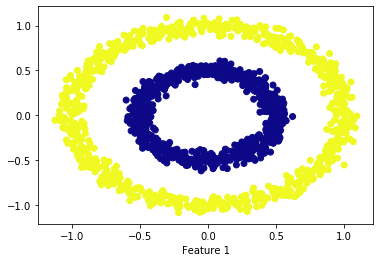

In [37]:
scaler = StandardScaler()
a_scaler= scaler.fit_transform(A)
dbscan = DBSCAN(eps=0.123, min_samples=2)
clusters=dbscan.fit_predict(A)

plt.scatter(A[:,0], A[:,1], c=clusters,cmap="plasma")
plt.xlabel("Feature 0")
plt.xlabel("Feature 1")